# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

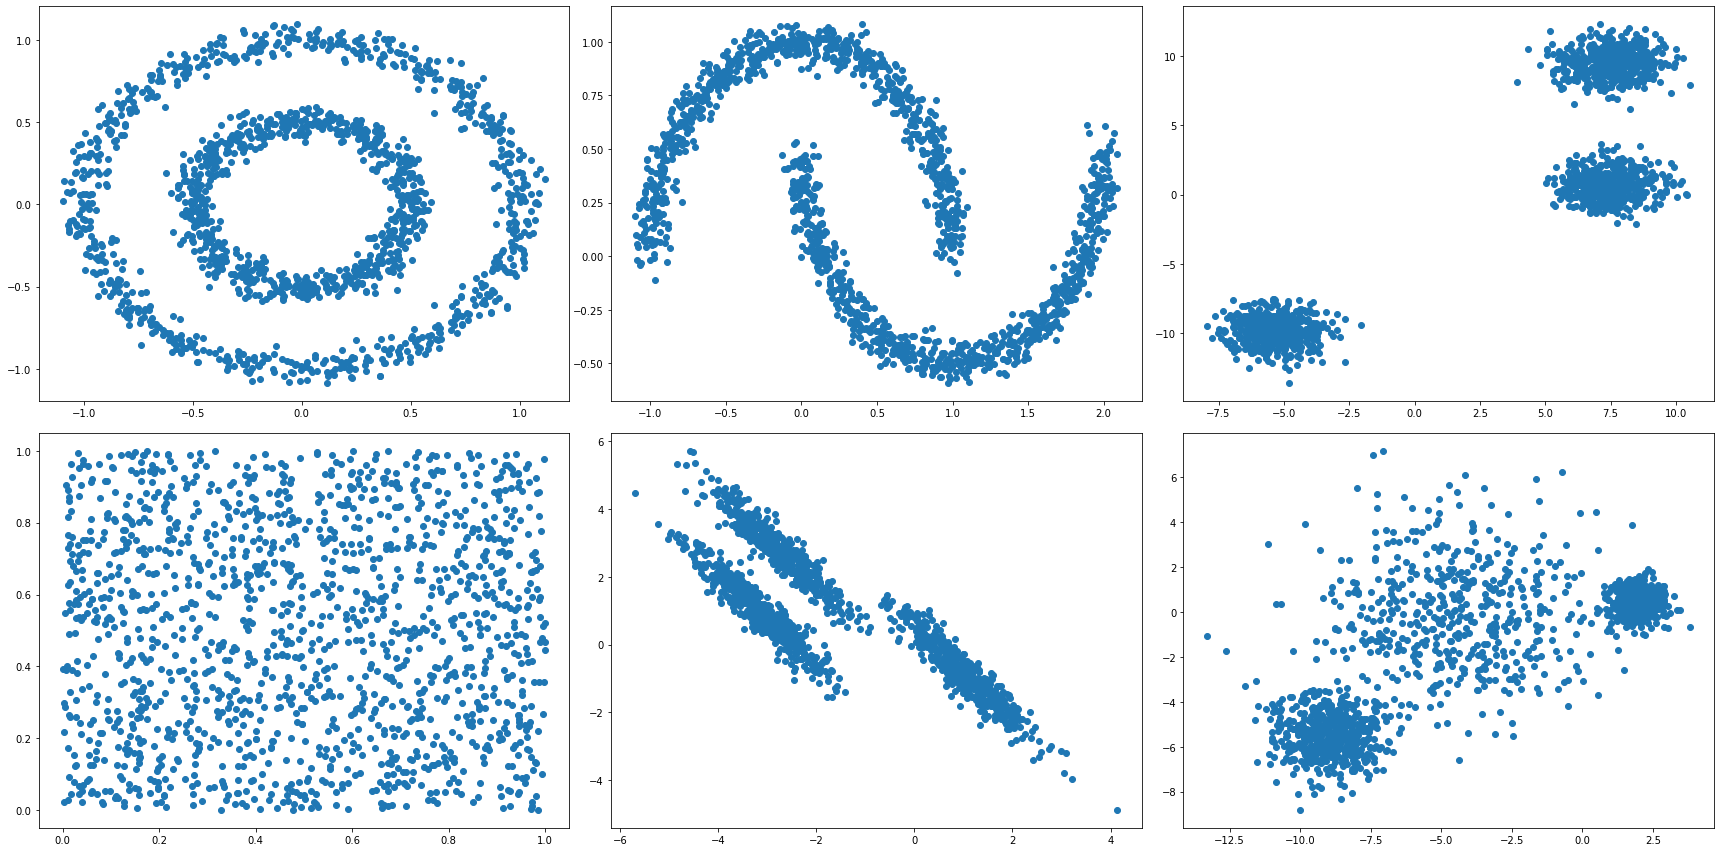

In [3]:
fig,axes = plt.subplots(2,3,figsize=(24, 12))
fig.tight_layout()
axes[0,0].scatter(A[:,0],A[:,1])
axes[0,1].scatter(B[:,0],B[:,1])
axes[0,2].scatter(C[:,0],C[:,1])
axes[1,0].scatter(D[:,0],D[:,1])
axes[1,1].scatter(E[:,0],E[:,1])
axes[1,2].scatter(F[:,0],F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

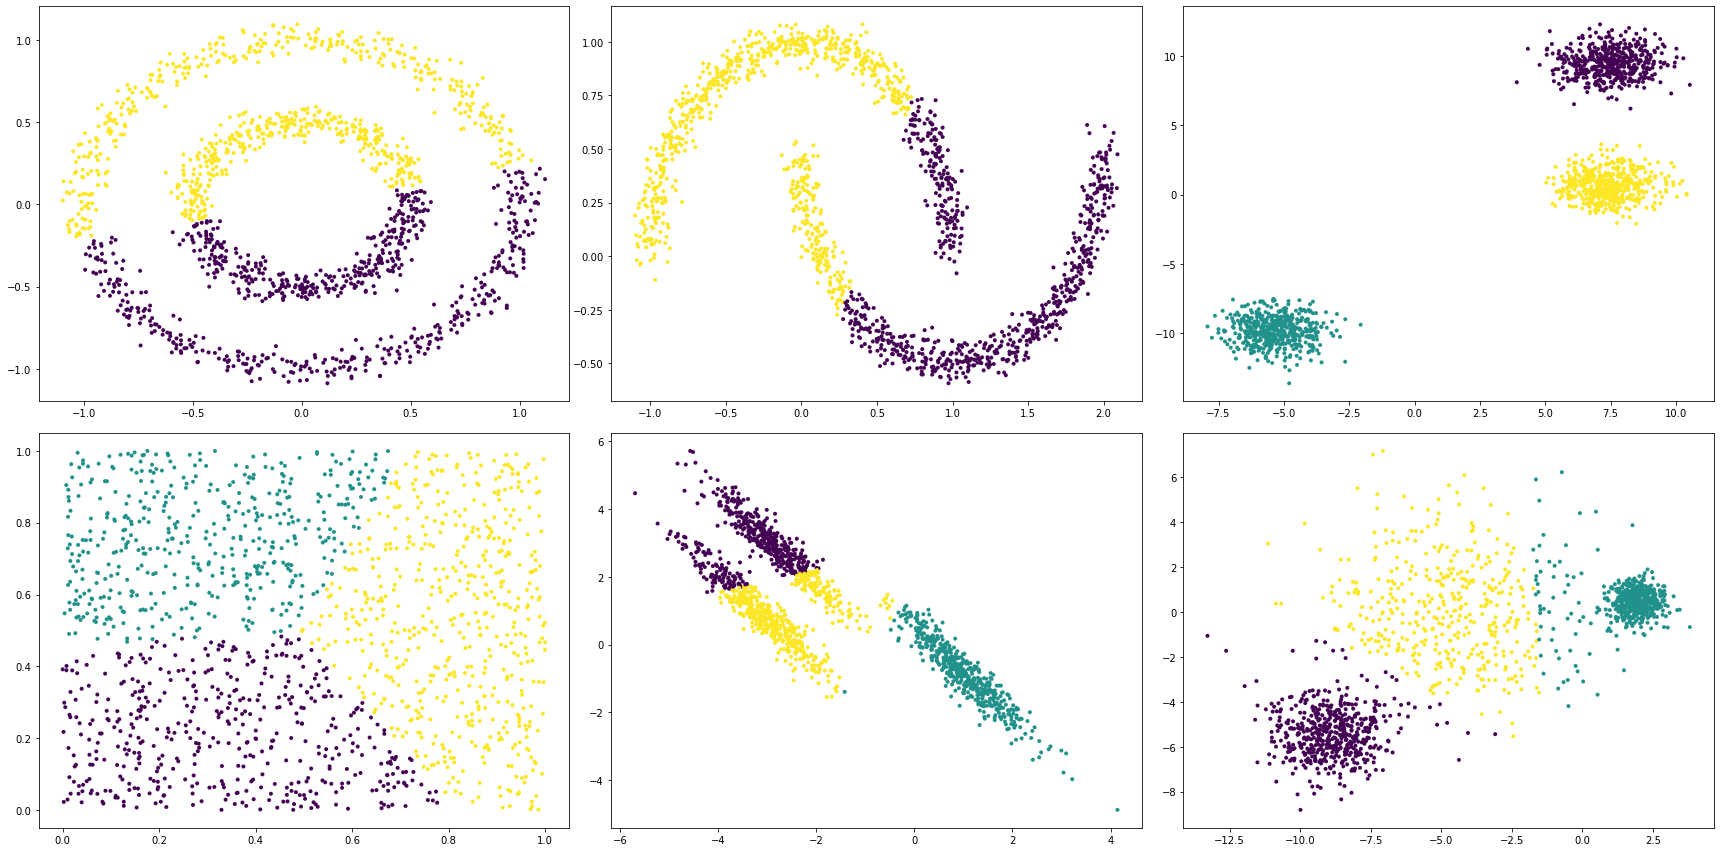

In [4]:
from sklearn.cluster import KMeans
import numpy as np

myKMeansA = KMeans(init='k-means++',n_clusters=2,random_state=0).fit_predict(A)
myKMeansB = KMeans(init='k-means++',n_clusters=2,random_state=0).fit_predict(B)
myKMeansC = KMeans(init='k-means++',n_clusters=3,random_state=0).fit_predict(C)
myKMeansD = KMeans(init='k-means++',n_clusters=3,random_state=0).fit_predict(D)
myKMeansE = KMeans(init='k-means++',n_clusters=3,random_state=0).fit_predict(E)
myKMeansF = KMeans(init='k-means++',n_clusters=3,random_state=0).fit_predict(F)


fig,axes = plt.subplots(2,3,figsize=(24, 12))
fig.tight_layout()
axes[0,0].scatter(A[:,0],A[:,1],s=15, linewidth=0.1, c=myKMeansA)
axes[0,1].scatter(B[:,0],B[:,1],s=15, linewidth=0.1, c=myKMeansB)
axes[0,2].scatter(C[:,0],C[:,1],s=15, linewidth=0.1, c=myKMeansC)
axes[1,0].scatter(D[:,0],D[:,1],s=15, linewidth=0.1, c=myKMeansD)
axes[1,1].scatter(E[:,0],E[:,1],s=15, linewidth=0.1, c=myKMeansE)
axes[1,2].scatter(F[:,0],F[:,1],s=15, linewidth=0.1, c=myKMeansF)


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


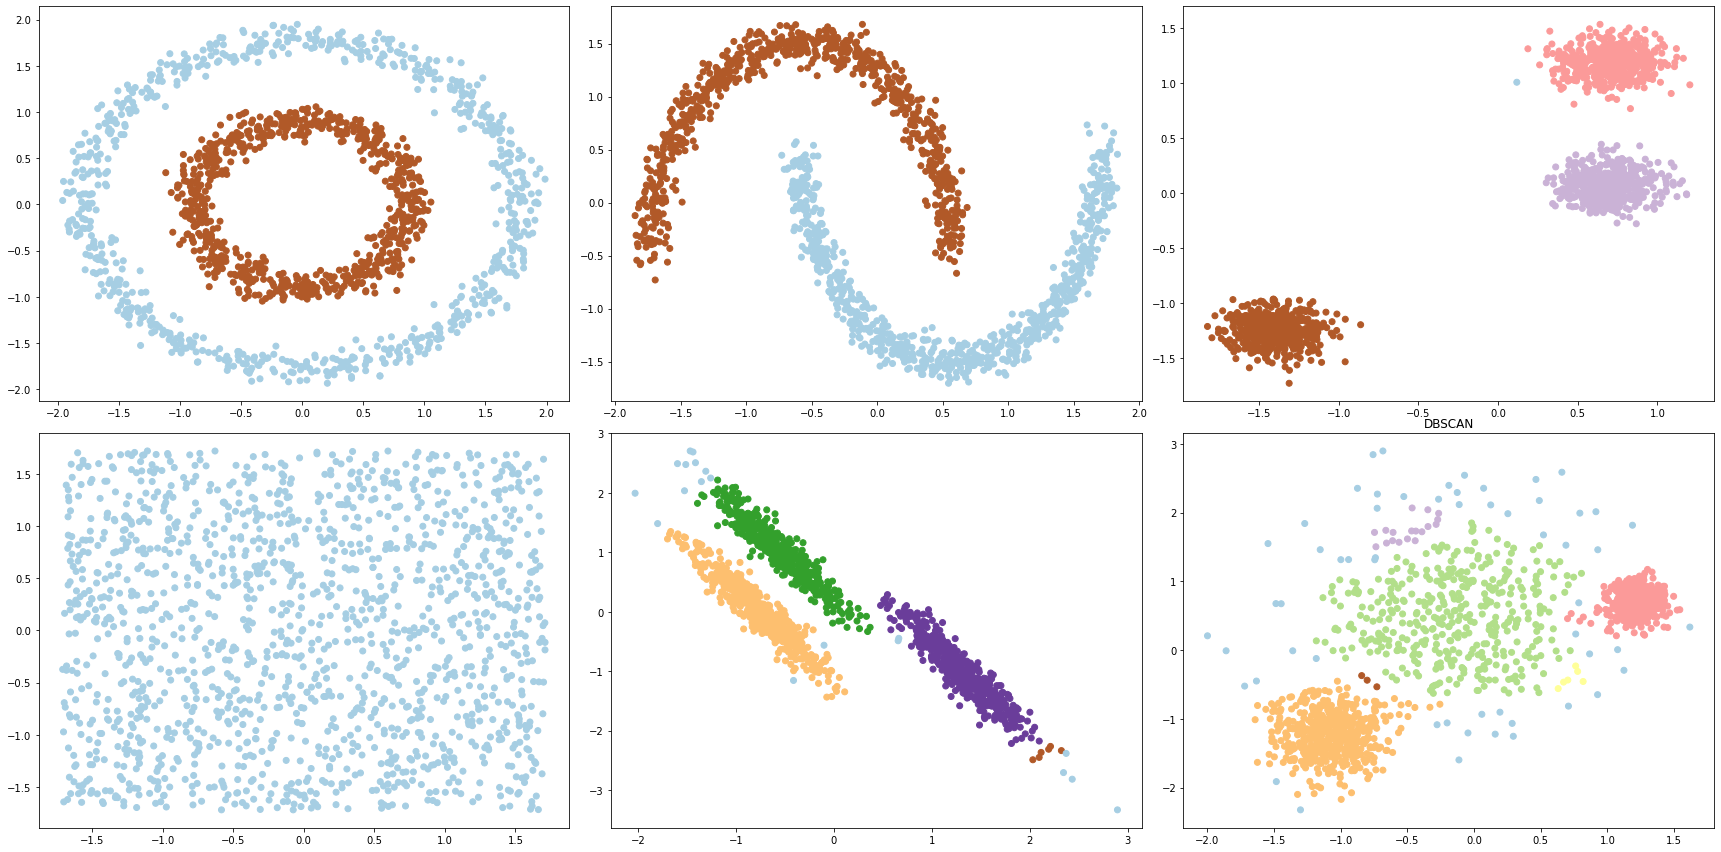

In [5]:
from sklearn.cluster import DBSCAN
import numpy as np

def dbscan(X, eps, min_samples,myAxe,posX,posY):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    myAxe[posX,posY].scatter(X[:,0],X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

fig,axes = plt.subplots(2,3,figsize=(24, 12))
fig.tight_layout()

dbscan(A,0.2,2,axes,0,0)
dbscan(B,0.2,2,axes,0,1)
dbscan(C,0.2,3,axes,0,2)
dbscan(D,0.2,5,axes,1,0)
dbscan(E,0.15,5,axes,1,1)
dbscan(F,0.15,3,axes,1,2)
